## Homework exercise 3 Choice B
## Deadline: upload to Moodle by 1 December 18:00 h

__Suggestion: take this notebook and simply add your code and explanations.__

If you prefer to use .py files, you are expected to also include a PDF containing the output of your code and your explanations. Still, the code needs to be in a form that can be easily run on another computer.

__Name 1:__ Adrián Štefánik 12215741

__Name 2:__ Linda Aldehoff 12234721

__Name 3:__


The file that you upload should be named *Homework3B_YourLastName_YourStudentID*.

Reminder: you are required to attend class on 2 December to earn points for this homework exercise unless you have a valid reason for your absence.

You are allowed to work on this exercise in groups of up to three students. If any part of the questions is unclear, please ask on the Moodle forum.

#### Stock return distributions

1. Please read in the data contained in the file `tr_eikon_eod_data.csv` that you can find the `data` folder of the course materials. Rescale the initial prices to 100 and plot the time series of those rescaled prices for AMZN.O and MSFT.O. The remaining questions will use only these two columns.

1        100.000000
2        100.589993
3         98.767737
4         97.087379
5         99.716206
           ...     
2211    1242.083645
2212    1262.949963
2213    1240.112024
2214    1270.687080
2215    1269.454817
Name: AMZN.O, Length: 2138, dtype: float64


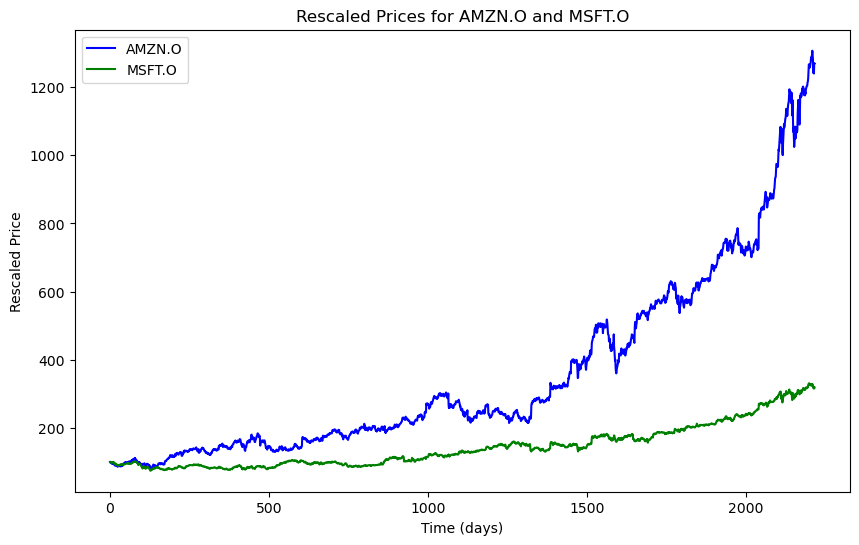

In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv(r"C:\Users\Hry\OneDrive\Dokumenty\Škola\Masters\Python for Finance\data\tr_eikon_eod_data.csv")

# Drop rows with missing values in the columns of interest
data = data.dropna(subset=["AMZN.O", "MSFT.O"])

# Rescale the data for AMZN.O and MSFT.O. use iloc function to lock to the first row  
amzn = data["AMZN.O"] / data["AMZN.O"].iloc[0] * 100
msft = data["MSFT.O"] / data["MSFT.O"].iloc[0] * 100


# Plot the rescaled data
plt.figure(figsize=(10, 6))
plt.plot(data.index, amzn, label="AMZN.O", color="blue")
plt.plot(data.index, msft, label="MSFT.O", color="green")
plt.title("Rescaled Prices for AMZN.O and MSFT.O")
plt.xlabel("Time (days)")
plt.ylabel("Rescaled Price")
plt.legend()
#plt.grid(True)
plt.show()



2. It is sometimes argued that avoiding the worst days, i.e., the days of the lowest returns, can dramatically improve investment performance, whereas others argue that trying to do so risks missing the best days, which might be more costly. To illustrate how avoiding the worst days / missing the best days can affect performance, please plot, for each of the two stocks, the change in value of an investment of 100 that holds the stock on all days

    a. except the one percent worst days (i.e. assuming a zero return on those days)

    b. except the one percent best days

    c. except both the one percent worst and the one percent best days

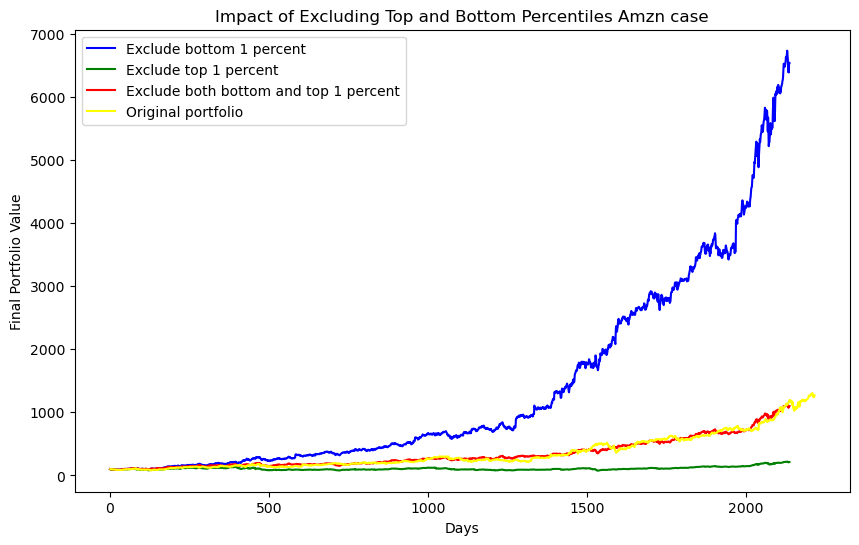

In [26]:
#amzn

#initiation 
portfolio_low = []  
portfolio_high = []  
portfolio_both = []  
returns = [] 

#calculate returns

for day, price in enumerate(amzn[1:], start =1):
    #calculate the price ratio 
    returns.append(amzn.iloc[day]/amzn.iloc[day-1] - 1 )

returns = np.array(returns)


#calculate  and exclude low 1 percentile 
returns_1 = returns.copy()
percentile_1 = returns_1 <= np.percentile(returns_1, 1)
returns_1[percentile_1] = 0

#calculate new prices 
starting_price_low = 100
for daily_return in returns_1:
    starting_price_low *= (1 + daily_return)
   # print(f"Updated portfolio value: {starting_price_low}, return was {1+daily_return}")
    portfolio_low.append(starting_price_low)

#calculate  and exclude top 1 percentile 
returns_99 = returns.copy()
percentile_99 = returns_99 >= np.percentile(returns_99, 99)
returns_99[percentile_99] = 0

#calculate new prices 
starting_price_high = 100
for daily_return in returns_99:
    starting_price_high *= (1 + daily_return)
    #print(f"Updated portfolio value: {starting_price_high}, return was {1+daily_return}")
    portfolio_high.append(starting_price_high)

#exclude both top and bottom 1 percentile 
returns_both = returns.copy()
returns_both[percentile_1] = 0
returns_both[percentile_99] = 0

#calculate new prices 
starting_price_both = 100
for daily_return in returns_both:
    starting_price_both *= (1 + daily_return)
    #print(f"Updated portfolio value: {starting_price_both}, return was {1+daily_return}")
    portfolio_both.append(starting_price_both)

#plot the results 
starting_prices = [100, starting_price_high, starting_price_low, starting_price_both] 
cases = ["original returns", 'Exclude Bottom 1%', 'Exclude Top 1%', 'Exclude Both Top & Bottom 1%']

plt.figure(figsize=(10, 6))
plt.plot(portfolio_low, label="Exclude bottom 1 percent", color="blue")
plt.plot(portfolio_high, label="Exclude top 1 percent", color="green")
plt.plot(portfolio_both, label="Exclude both bottom and top 1 percent", color="red")
plt.plot(amzn, label="Original portfolio", color="yellow")
plt.title("Impact of Excluding Top and Bottom Percentiles Amzn case")
plt.xlabel("Days")
plt.ylabel("Final Portfolio Value")
plt.legend()
#plt.grid(True)
plt.show()



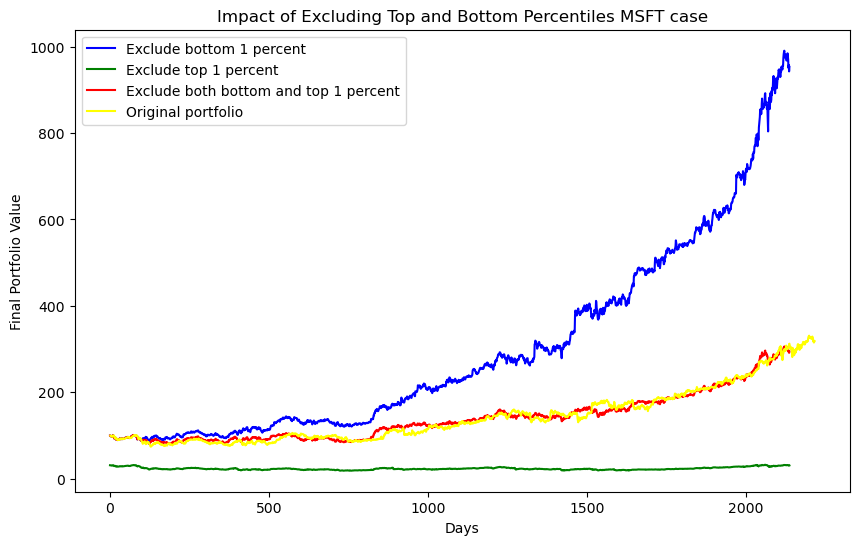

In [28]:
#msft
#initiation
portfolio_low = []  
portfolio_high = []  
portfolio_both = []  
returns = [] 

#calculate returns


for day, price in enumerate(msft[1:]):
    returns.append(msft.iloc[day]/msft.iloc[day-1] - 1 )

returns = np.array(returns)

#calculate  and exclude low 1 percentile 
returns_1 = returns.copy()
percentile_1 = returns_1 <= np.percentile(returns_1, 1)
returns_1[percentile_1] = 0

#calculate new prices 
starting_price_low = 100
for daily_return in returns_1:
    starting_price_low *= (1 + daily_return)
   # print(f"Updated portfolio value: {starting_price_low}, return was {1+daily_return}")
    portfolio_low.append(starting_price_low)

#calculate  and exclude top 1 percentile 
returns_99 = returns.copy()
percentile_99 = returns_99 >= np.percentile(returns_99, 99)
returns_99[percentile_99] = 0

#calculate new prices 
starting_price_high = 100
for daily_return in returns_99:
    starting_price_high *= (1 + daily_return)
    #print(f"Updated portfolio value: {starting_price_high}, return was {1+daily_return}")
    portfolio_high.append(starting_price_high)

#exclude both top and bottom 1 percentile 
returns_both = returns.copy()
returns_both[percentile_1] = 0
returns_both[percentile_99] = 0

#calculate new prices 
starting_price_both = 100
for daily_return in returns_both:
    starting_price_both *= (1 + daily_return)
    #print(f"Updated portfolio value: {starting_price_both}, return was {1+daily_return}")
    portfolio_both.append(starting_price_both)

#plot the results 

plt.figure(figsize=(10, 6))
plt.plot(portfolio_low, label="Exclude bottom 1 percent", color="blue")
plt.plot(portfolio_high, label="Exclude top 1 percent", color="green")
plt.plot(portfolio_both, label="Exclude both bottom and top 1 percent", color="red")
plt.plot(msft, label="Original portfolio", color="yellow")
plt.title("Impact of Excluding Top and Bottom Percentiles MSFT case")
plt.xlabel("Days")
plt.ylabel("Final Portfolio Value")
plt.legend()
#plt.grid(True)
plt.show()



3. Based on the data for the daily returns of the two stocks, you are asked to implement a __bootstrap__. A bootstrap repeatedly draws a set of random observations from an existing data set.

    a. For each of the two stocks, create 10000 artifical time series of returns. The length of the artificial time series should be equal to the length of the original time series. To create the artificial time series, randomly choose rows from the original data with replacement.
    
    b. Compute the cumulative return of each of the simulated time series and plot the distribution of the cumulative returns reached at the end of each time series using the `density` plot available in `pandas`. Mark the total cumulative return of your original data in your plot using a vertical line.

Text(0.5, 1.0, 'Cumulative Returns of Simulated Time Series vs Original Returns')

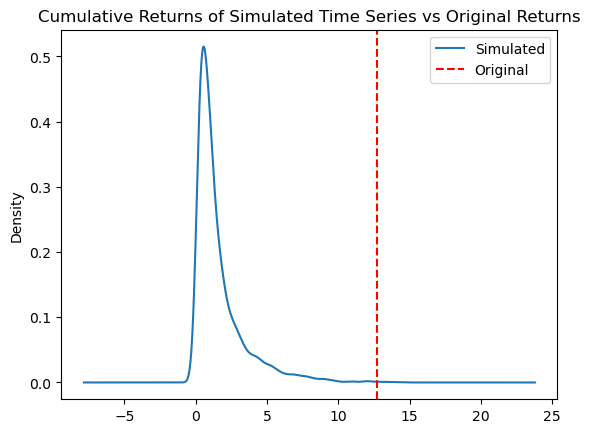

In [41]:
#amzn 
rng = np.random.default_rng(12345) 

#create a matrix where we will later store our portfolios
artificial_portfolios_amzn = np.zeros((10000,len(amzn)+1))
a = rng.choice(amzn)
#generate random draws from amzn and store them in our matrix
for i in range(0,10000):
    artificial_portfolios_amzn[i, :] = rng.choice(amzn, size=len(amzn)+1, replace=True)
    
#calculate returns from our matrix
returns_amzn = (artificial_portfolios_amzn[:, 1: ] /  artificial_portfolios_amzn[:, :-1]) 


#cumulate returns 
cumulative_returns_amzn = np.cumprod(returns_amzn, axis = 1)

#get the cumulative returns reached at the end o feach time series 
returns_last_days_amzn = cumulative_returns_amzn[:,-1]

returns_last_days_amzn = pd.Series(returns_last_days_amzn)  


returns_last_days_amzn.plot.density(bw_method=None, ind=None, label = "Simulated")
cumulative_return_amzn_original = amzn.iloc[-1] / amzn.iloc[0]

#get original cumulative returns
original_returns_amzn = data["AMZN.O"] / data["AMZN.O"].iloc[0]
original_returns_amzn = pd.Series(original_returns_amzn)
final_cumulative_return_original_amzn = original_returns_amzn.iloc[-1]

plt.axvline(final_cumulative_return_original_amzn, color='red', linestyle='dashed', label = "Original")
plt.legend()
plt.title("Cumulative Returns of Simulated Time Series vs Original Returns")

#plt.legend()



#get cummulative returns 
#cumulative_returns_amzn = 

Text(0.5, 1.0, 'Cumulative Returns of Simulated Time Series vs Original Returns')

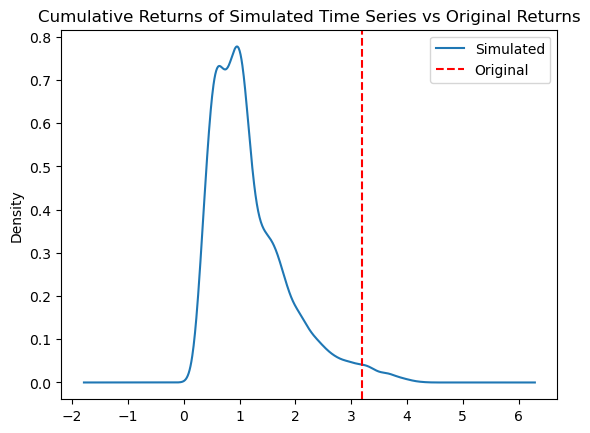

In [39]:

#msft 

#create a matrix where we will store our portfolios
artificial_portfolios_msft = np.zeros((10000,len(msft)+1))
#generate random draws from msft and store them in our matrix
for i in range(0,10000):
    artificial_portfolios_msft[i, :] = rng.choice(msft, size=len(msft)+1, replace=True)
    
#calculate returns from our matrix
returns_msft = (artificial_portfolios_msft[:, 1: ] /  artificial_portfolios_msft[:, :-1]) 


#cumulate returns 
cumulative_returns_msft = np.cumprod(returns_msft, axis = 1)

#get the cumulative returns reached at the end o feach time series 
returns_last_days_msft = cumulative_returns_msft[:,-1]

returns_last_days_msft = pd.Series(returns_last_days_msft)  


returns_last_days_msft.plot.density(bw_method=None, ind=None, label = "Simulated")

cumulative_return_msft_original = amzn.iloc[-1] / amzn.iloc[0]

#get original cumulative returns
original_returns_msft = data["MSFT.O"] / data["MSFT.O"].iloc[0]
original_returns_msft = pd.Series(original_returns_msft)
final_cumulative_return_original_msft = original_returns_msft.iloc[-1]

plt.axvline(final_cumulative_return_original_msft, color='red', linestyle='dashed', label='Original')
plt.legend()
plt.title("Cumulative Returns of Simulated Time Series vs Original Returns")



#get cummulative returns 
#cumulative_returns_amzn = 